In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../Week 0 (Original database)/googleplaystore.csv")

In [3]:
df.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [4]:
def convert_size(size):
    if size.endswith('M'):
        return float(size[:-1])
    elif size.endswith('k'):
        return float(size[:-1]) / 1024
    else:
        return size

In [5]:
df["Size"] = df["Size"].apply(convert_size)

In [6]:
df.Size.value_counts()

Varies with device    1695
11.0                   198
12.0                   196
14.0                   194
13.0                   191
                      ... 
0.4189453125             1
0.1953125                1
0.44921875               1
0.7109375                1
0.6044921875             1
Name: Size, Length: 461, dtype: int64

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.shape

(10841, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Tasks
Find and drop duplicates -done
Fill null values in rating with the mean -done
Fix column names with spaces -done
Fix shifted rows -done
to_numeric Installs, Size, etc. done


In [10]:
df = df.drop_duplicates("App")

In [11]:
df.Category.value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [12]:
df[df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
df.loc[10472] = ["Life Made WI-Fi Touchscreen Photo Frame", "TOOLS", 1.9, 19, "3.0M", "1,000+", "Free", 0, "Everyone", "Tools", "February 11, 2018", "1.0.19", "4.0 and up"]

In [14]:
df = df.drop(columns=["Genres", "Last Updated", "Current Ver", "Android Ver"])

In [15]:
df.Rating.fillna(df.Rating.mean(), inplace=True)

In [16]:
df.Reviews = pd.to_numeric(df.Reviews)


In [17]:
df.Installs = df.Installs.str.replace("+", "", regex=True)
df.Installs = df.Installs.str.replace(",", "", regex=True)
df.Installs = pd.to_numeric(df.Installs)


In [18]:
df["Type"].fillna("Free", inplace=True)

In [19]:
df.Price = df.Price.str.replace("$", "", regex=True)
df.Price = pd.to_numeric(df.Price)


In [20]:
df.Price.fillna(0, inplace=True)
df.Price.value_counts()

0.00      8904
0.99       145
2.99       124
1.99        73
4.99        70
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: Price, Length: 92, dtype: int64

In [21]:
df = df.rename(columns={"Content Rating": "Content_Rating"})

In [22]:
df.Content_Rating.value_counts()

Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content_Rating, dtype: int64

In [23]:
df.Content_Rating = df.Content_Rating.astype("category")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             9660 non-null   object  
 1   Category        9660 non-null   object  
 2   Rating          9660 non-null   float64 
 3   Reviews         9660 non-null   int64   
 4   Size            9660 non-null   object  
 5   Installs        9660 non-null   int64   
 6   Type            9660 non-null   object  
 7   Price           9660 non-null   float64 
 8   Content_Rating  9660 non-null   category
dtypes: category(1), float64(2), int64(2), object(4)
memory usage: 946.9+ KB


In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone


In [36]:
df.Size.value_counts()

Varies with device    1227
11.0                   182
12.0                   181
14.0                   177
13.0                   177
                      ... 
0.419921875              1
0.4189453125             1
0.1953125                1
0.44921875               1
0.6044921875             1
Name: Size, Length: 461, dtype: int64

In [26]:
df.Installs.value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           889
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [27]:
df.to_csv('googleplaystore_clean.csv', index=False)

In [28]:
df1 = df[df["Installs"] == 1000000000]
df1 = df1.sort_values("Reviews", ascending=False)

In [29]:
df2 = df1.head(3)
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen


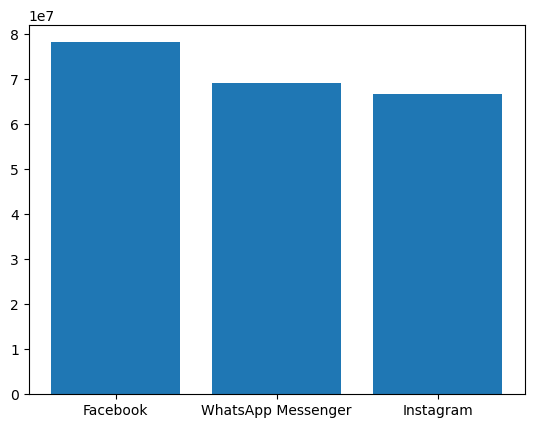

In [30]:
plt.bar(df2.App, df2.Reviews)
plt.show()

In [3]:
df_rev = pd.read_csv("../Week 0 (Original database)/googleplaystore_user_reviews.csv")

In [32]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [33]:
df_rev = df_rev.dropna()


In [34]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [35]:
df_rev.to_csv('user_reviews_clean.csv', index=False)